In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [2]:
wards = gpd.read_file('./output/shp/study_area_cases.shp')

In [3]:
w = Queen.from_dataframe(wards)
w.transform = 'r'

In [4]:
y = wards.cases.values

In [5]:
from esda.moran import Moran
moran = Moran(y,w)
moran.I

0.3802894491129785

In [6]:
from splot.esda import moran_scatterplot

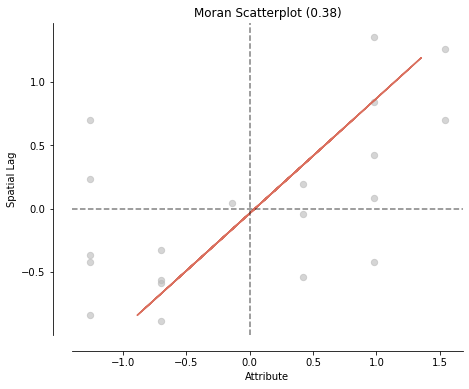

In [7]:
fig, ax = moran_scatterplot(moran, aspect_equal= True)
plt.show()

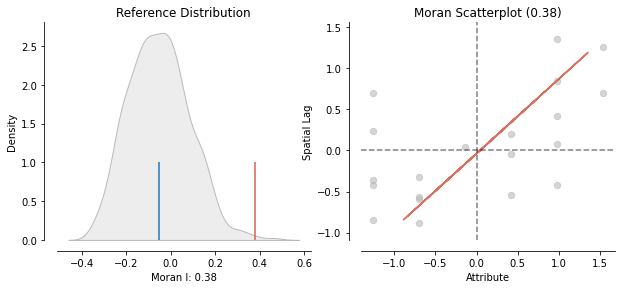

In [8]:
from splot.esda import plot_moran
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [9]:
moran.p_sim

0.004

In [10]:
from esda.moran import Moran_Local

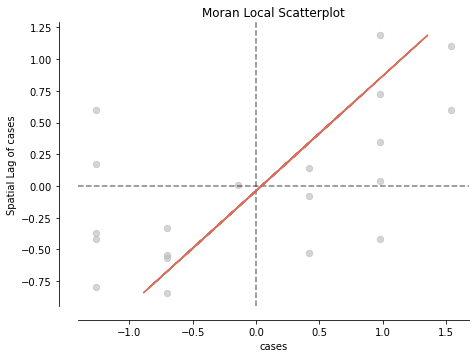

In [11]:
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('cases')
ax.set_ylabel('Spatial Lag of cases')
plt.show()

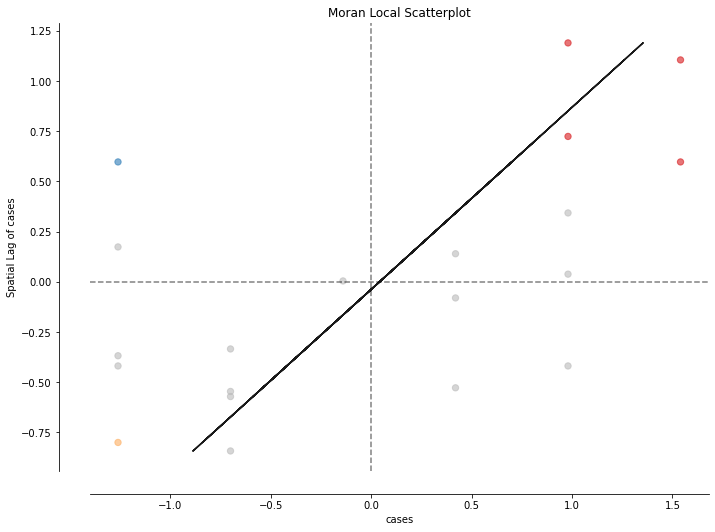

In [27]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
fig.set_size_inches(10,10)
ax.set_xlabel('cases')
ax.set_ylabel('Spatial Lag of cases')
plt.tight_layout()
plt.savefig('./output/jpg/moran_global.jpg',dpi = 150)
plt.show()

In [23]:
from splot.esda import lisa_cluster

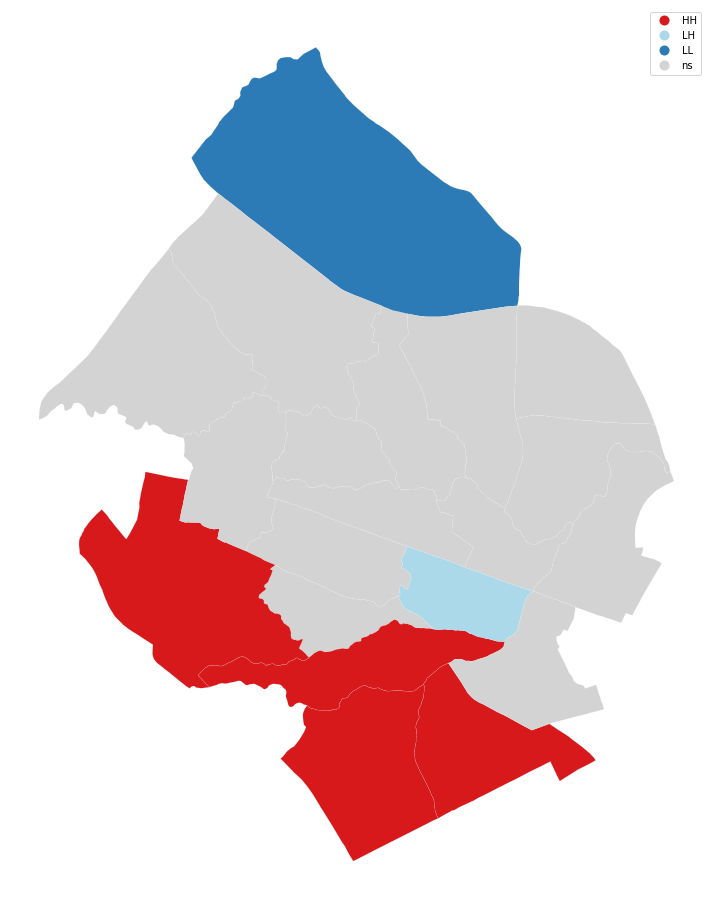

In [29]:
fig,ax = lisa_cluster(moran_loc, wards, p=0.05, figsize = (9,9))
fig.set_size_inches(10,15)
plt.tight_layout()
plt.savefig('./output/jpg/moran_map.jpg',dpi = 150)
plt.show()

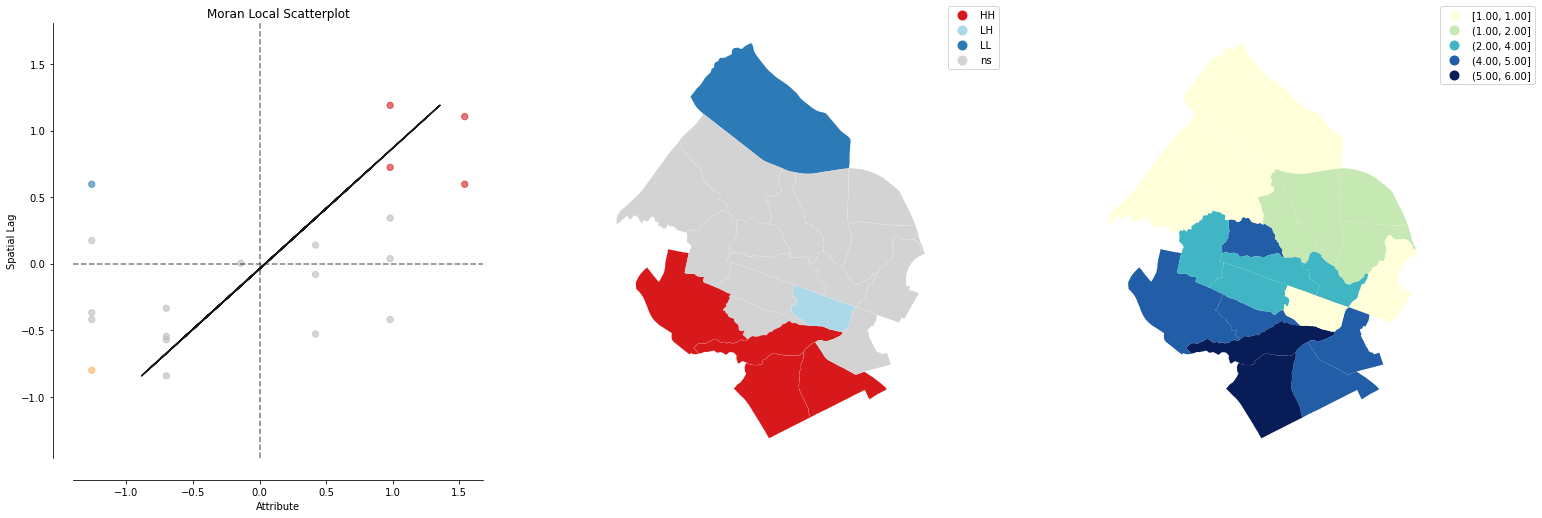

In [26]:
from splot.esda import plot_local_autocorrelation
fig, ax = plot_local_autocorrelation(moran_loc, wards, 'cases', figsize = (25,8))
plt.show()

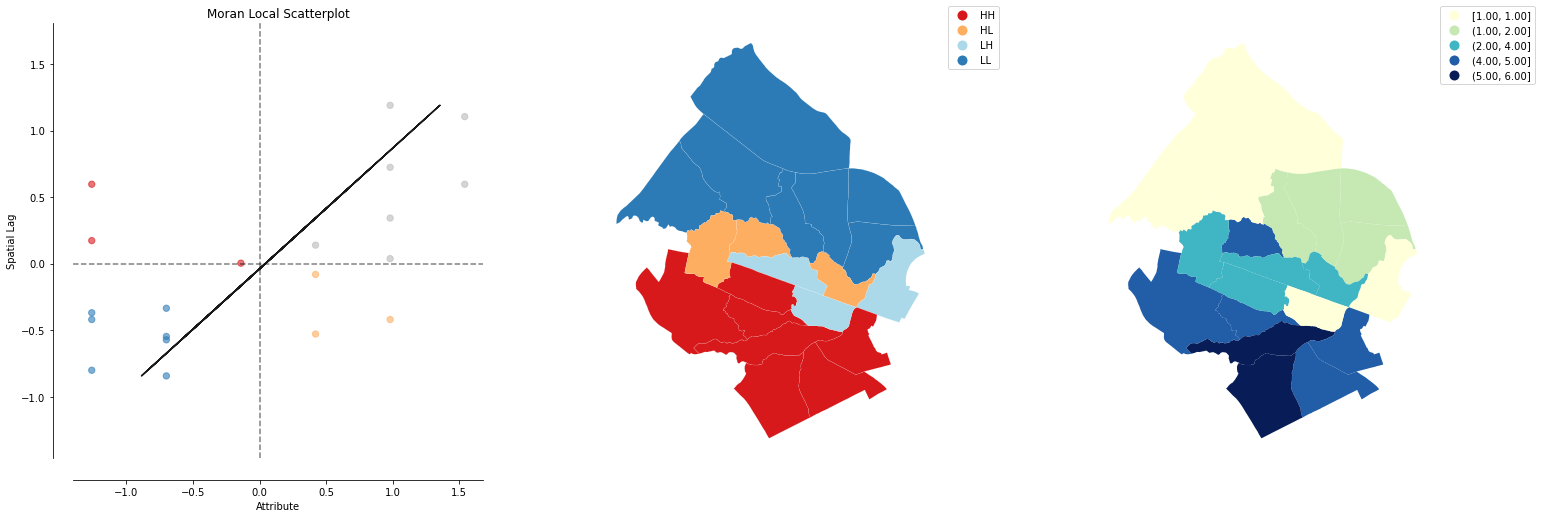

In [39]:
from splot.esda import plot_local_autocorrelation
fig, ax = plot_local_autocorrelation(moran_loc, wards, 'cases', figsize = (25,8), p = 0.5)
plt.show()